# 탐색적 데이터 분석
## 1.데이터 불러오기

In [1]:
import pandas as pd

data_path = '/kaggle/input/competitive-data-science-predict-future-sales/'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [2]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [12]:
# 데이터 병합
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [13]:
# 피처 요약표
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=["데이터 타입"])
    summary.reset_index()
    summary = summary.rename(columns={'index': "피처"})
    summary["결측값 개수"] = df.isnull().sum().values
    summary["고윳값 개수"] = df.nunique().values
    summary["첫번째 값"] = df.loc[0].values
    summary["두번째 값"] = df.loc[1].values
    summary["세번째 값"] = df.loc[2].values
    return summary

resumetable(train)

데이터셋 형상: (2935849, 10)


,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
date,object,0,1034,02.01.2013,03.01.2013,05.01.2013
date_block_num,int64,0,34,0,0,0
shop_id,int64,0,60,59,25,25
item_id,int64,0,21807,22154,2552,2552
item_price,float64,0,19993,999.0,899.0,899.0
item_cnt_day,float64,0,198,1.0,1.0,-1.0
shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум""","Москва ТРК ""Атриум"""
item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP,DEEP PURPLE The House Of Blue Light LP
item_category_id,int64,0,84,37,58,58
item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил,Музыка - Винил


## 2.데이터 시각화

<Axes: ylabel='item_cnt_day'>

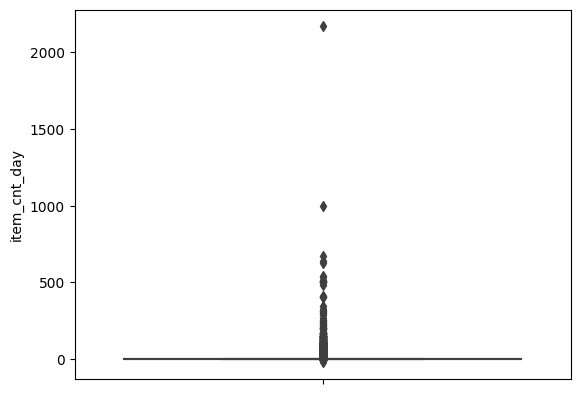

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train) # 일별 판매량

<Axes: ylabel='item_price'>

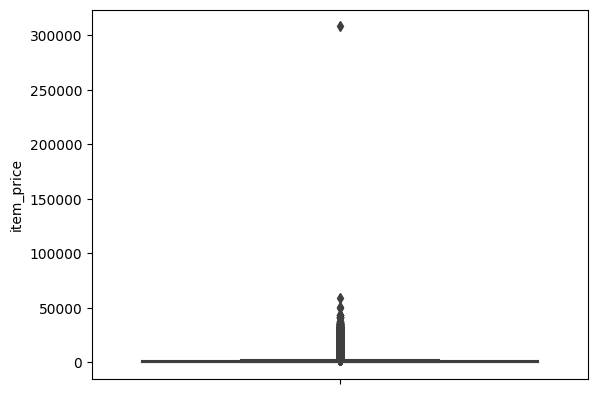

In [15]:
sns.boxplot(y='item_price', data=train) # 판매가(상품 가격)

In [16]:
# 그룹화
group = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index() # 인덱스 재설정

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

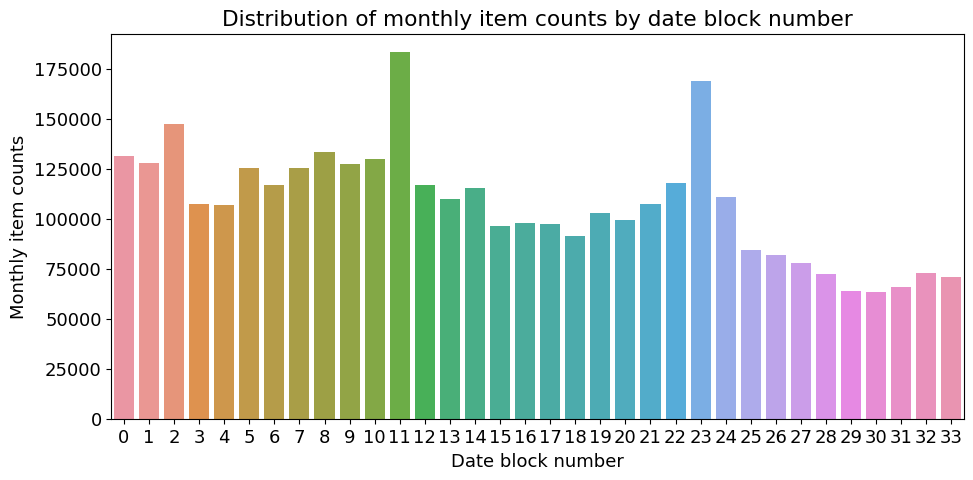

In [17]:
# 월별 판매량
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 월별 총 상품 판매량
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

# 월별 총 상품 판매량 막대 그래프
sns.barplot(x='date_block_num', y = 'item_cnt_day', data=group_month_sum)

# 그래프 제목, x축 라벨, y축 라벨 설정
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number',
       ylabel='Monthly item counts')

In [18]:
train['item_category_id'].nunique()

84

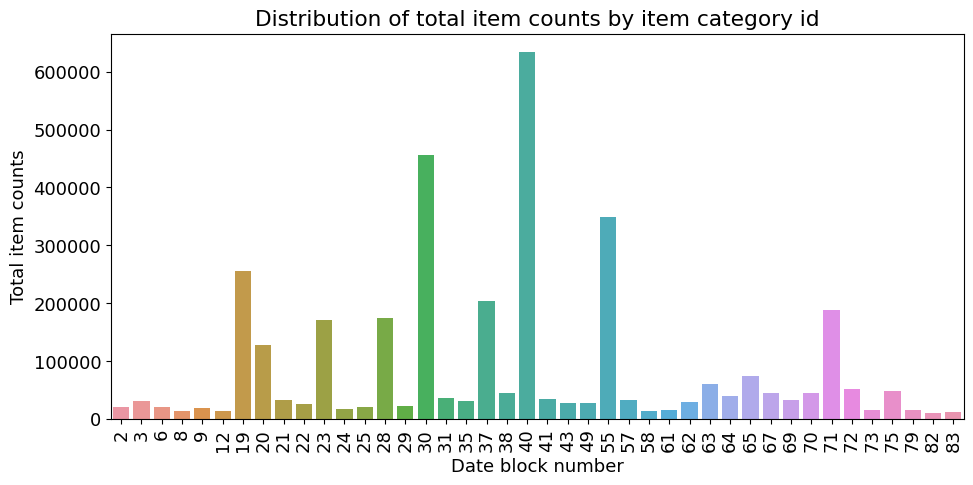

In [19]:
# 상품분류별 판매량
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상품분류별 총 상품 판매량
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 월간 판매량이 10.000개를 초과하는 상품분류만 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] > 10000]

# 상품분류별 총 상품 판매량 막대 그래프
sns.barplot(x='item_category_id', y = 'item_cnt_day', data=group_cat_sum)

# 그래프 제목, x축 라벨, y축 라벨 설정
ax.set(title='Distribution of total item counts by item category id',
       xlabel='Date block number',
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전

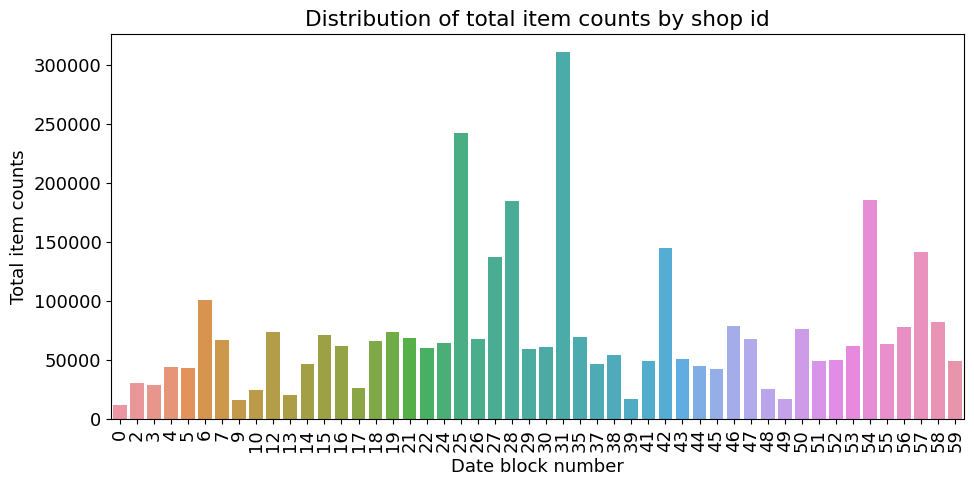

In [20]:
# 상점별 판매량
mpl.rc('font', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_shop_sum = group_shop_sum.reset_index()
group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_day'] > 10000]

# 상점별 총 상품 판매량 막대 그래프
sns.barplot(x='shop_id', y = 'item_cnt_day', data=group_shop_sum)

# 그래프 제목, x축 라벨, y축 라벨 설정
ax.set(title='Distribution of total item counts by shop id',
       xlabel='Date block number',
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전

# 베이스라인
## 1.피처명 한글화


In [21]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore') # 경고 문구 생략

data_path = '/kaggle/input/competitive-data-science-predict-future-sales/'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [22]:
sales_train = sales_train.rename(columns={'date':'날짜',
                                          'date_block_num':'월ID',
                                          'shop_id':'상점ID',
                                          'item_id':'상품ID',
                                          'item_price':'판매가',
                                          'item_cnt_day':'판매량'})
sales_train.head()

,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [23]:
shops = shops.rename(columns={'shop_name':'상점명',
                              'shop_id':'상점ID'})
shops.head()

,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [24]:
items = items.rename(columns={'item_name':'상품명',
                              'item_id':'상품ID',
                              'item_category_id':'상품분류ID'})
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [25]:
item_categories = item_categories.rename(columns={'item_category_name':'상품분류명',
                                                  'item_category_id':'상품분류ID'})
item_categories.head()

,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [26]:
test = test.rename(columns={'shop_id':'상점ID',
                            'item_id':'상품ID'})
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## 2.데이터 다운캐스팅 

In [27]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df

In [28]:
all_df = [sales_train, shops, items, item_categories, test]

for df in all_df:
    df = downcast(df)

54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


## 3.데이터 조합 생성

In [29]:
from itertools import product

train = []
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
train = pd.DataFrame(np.vstack(train), columns=idx_features)
train.head()

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


## 4.타깃값(월간 판매량) 추가

In [30]:
group = sales_train.groupby(idx_features).agg({'판매량':'sum'})
group = group.reset_index()
group = group.rename(columns={'판매량':'월간 판매량'})
group.head()

,월ID,상점ID,상품ID,월간 판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2


In [31]:
# train과 group 병합하기
train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN


In [32]:
# 가비지 컬렉션
import gc

del group
gc.collect()

0

## 5.테스트 데이터 이어붙이기

In [33]:
test['월ID'] = 34

In [34]:
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN


In [35]:
# 결측값을 0으로 대체
all_data = all_data.fillna(0)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0


## 6.나머지 데이터 병합(최종 데이터 생성)

In [36]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션
del shops, items, item_categories
gc.collect()

31.1% 압축됨


0

In [37]:
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상점명,상품명,상품분류ID,상품분류명
0,0,59,22154,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,59,2552,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,0,59,2554,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,0,59,2555,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,0,59,2564,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео


In [38]:
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,상품분류ID
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59


## 7.마무리

In [39]:
# 훈련 데이터(피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)
# 검증 데이터(피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)
# 테스트 데이터(피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)
# 훈련 데이터(타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
y_train = y_train.clip(0, 20) # 타깃값을 0 ~ 20으로 제한
# 검증 데이터(타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']
y_valid = y_valid.clip(0, 20) # 타깃값을 0 ~ 20으로 제한

In [40]:
del all_data
gc.collect()

0

## 8.모델 훈련 및 성능 검증

In [41]:
import lightgbm as lgb

# LightGBM용 하이퍼파라미터
params = {'metric':'rmse',
          'num_leaves':255,
          'learning_rate':0.01,
          'force_col_wise':True,
          'random_state':10}

# 범주형 피처 설정
cat_features = ['상점ID', '상품분류ID']

# LightGBM용 훈련 및 검증 데이터셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

# LightGBM 모델 훈련
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=500,
                      valid_sets=(dtrain, dvalid),
                      categorical_feature=cat_features,
                      verbose_eval=50)

[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 10675678, number of used features: 4
[LightGBM] [Info] Start training from score 0.299125
[50]	training's rmse: 1.14777	valid_1's rmse: 1.06755
[100]	training's rmse: 1.11425	valid_1's rmse: 1.0386
[150]	training's rmse: 1.09673	valid_1's rmse: 1.02671
[200]	training's rmse: 1.08573	valid_1's rmse: 1.02027
[250]	training's rmse: 1.07722	valid_1's rmse: 1.01661
[300]	training's rmse: 1.0698	valid_1's rmse: 1.0138
[350]	training's rmse: 1.06317	valid_1's rmse: 1.01084
[400]	training's rmse: 1.05734	valid_1's rmse: 1.00936
[450]	training's rmse: 1.05224	valid_1's rmse: 1.00818
[500]	training's rmse: 1.04792	valid_1's rmse: 1.00722


## 9.예측 및 결과 제출

In [42]:
preds = lgb_model.predict(X_test).clip(0, 20)

In [43]:
submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

In [44]:
del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect()

362

# 성능 개선
## 1.피처명 한글화

In [45]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore') # 경고 문구 생략

data_path = '/kaggle/input/competitive-data-science-predict-future-sales/'
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [46]:
sales_train = sales_train.rename(columns={'date':'날짜',
                                          'date_block_num':'월ID',
                                          'shop_id':'상점ID',
                                          'item_id':'상품ID',
                                          'item_price':'판매가',
                                          'item_cnt_day':'판매량'})

shops = shops.rename(columns={'shop_name':'상점명',
                              'shop_id':'상점ID'})

items = items.rename(columns={'item_name':'상품명',
                              'item_id':'상품ID',
                              'item_category_id':'상품분류ID'})

item_categories = item_categories.rename(columns={'item_category_name':'상품분류명',
                                                  'item_category_id':'상품분류ID'})

test = test.rename(columns={'shop_id':'상점ID',
                            'item_id':'상품ID'})

## 2.데이터 다운캐스팅

In [47]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df

## 3.개별 데이터 피처 엔지니어링

In [48]:
# 판매가가 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매가'] > 0]
# 판매가가 50,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매가'] < 50000]
# 판매량이 0보다 큰 데이터 추출
sales_train = sales_train[sales_train['판매량'] > 0]
# 판매량이 1,000보다 작은 데이터 추출
sales_train = sales_train[sales_train['판매량'] < 1000]

In [49]:
print(shops['상점명'][0], '||', shops['상점명'][57])
print(shops['상점명'][1], '||', shops['상점명'][58])
print(shops['상점명'][10], '||', shops['상점명'][11])
print(shops['상점명'][39], '||', shops['상점명'][40])

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [50]:
# sales_train 데이터에서 상점ID 수정
sales_train.loc[sales_train['상점ID'] == 0, '상점ID'] = 57
sales_train.loc[sales_train['상점ID'] == 1, '상점ID'] = 58
sales_train.loc[sales_train['상점ID'] == 10, '상점ID'] = 11
sales_train.loc[sales_train['상점ID'] == 39, '상점ID'] = 40

# test 데이터에서 상점ID 수정
test.loc[test['상점ID'] == 0, '상점ID'] = 57
test.loc[test['상점ID'] == 1, '상점ID'] = 58
test.loc[test['상점ID'] == 10, '상점ID'] = 11
test.loc[test['상점ID'] == 39, '상점ID'] = 40

In [51]:
shops['도시'] = shops['상점명'].apply(lambda x:x.split()[0])

In [52]:
shops['도시'].unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

In [53]:
shops.loc[shops['도시'] == '!Якутск', '도시'] = 'Якутск'

In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
shops['도시'] = label_encoder.fit_transform(shops['도시'])

In [55]:
# 상점명 피처 제거
shops = shops.drop('상점명', axis=1)
shops.head()

,상점ID,도시
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [56]:
# 상품명 피처 제거
items = items.drop('상품명', axis=1)
items.head()

,상품ID,상품분류ID
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [57]:
# 상품이 맨 처음 팔린 날을 피처로 추가
items['첫 판매월'] = sales_train.groupby('상품ID').agg({'월ID':'min'})['월ID']
items.head()

,상품ID,상품분류ID,첫 판매월
0,0,40,20.0
1,1,76,15.0
2,2,40,19.0
3,3,40,18.0
4,4,40,20.0


In [58]:
items[items['첫 판매월'].isna()]

,상품ID,상품분류ID,첫 판매월
83,83,40,NaN
140,140,45,NaN
168,168,44,NaN
173,173,45,NaN
204,204,44,NaN
...,...,...,...
21974,21974,61,NaN
21975,21975,61,NaN
22022,22022,40,NaN
22035,22035,40,NaN


In [59]:
# 첫 판매월 피처의 결측값을 34로 대체
items['첫 판매월'] = items['첫 판매월'].fillna(34)

In [60]:
# 상품분류명의 첫 단어를 대분류로 추출
item_categories['대분류'] = item_categories['상품분류명'].apply(lambda x:x.split()[0])

In [61]:
item_categories['대분류'].value_counts()

대분류
Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Карты          5
Кино           5
Служебные      2
Чистые         2
PC             1
Билеты         1
Доставка       1
Элементы       1
Name: count, dtype: int64

In [62]:
def make_etc(x):
    if len(item_categories[item_categories['대분류'] == x]) >= 5:
        return x
    else:
        return 'etc'

In [63]:
# 대분류의 고윳값 개수가 5개 미만이면, 'etc'로 바꾸기
item_categories['대분류'] = item_categories['대분류'].apply(make_etc)

In [64]:
item_categories.head()

,상품분류명,상품분류ID,대분류
0,PC - Гарнитуры/Наушники,0,etc
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [65]:
label_encoder = LabelEncoder()
item_categories['대분류'] = label_encoder.fit_transform(item_categories['대분류'])

In [66]:
# 상품분류명 피처 제거
item_categories = item_categories.drop('상품분류명', axis=1)
item_categories.head()

,상품분류ID,대분류
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


## 4.데이터 조합

In [67]:
from itertools import product

train = []
for i in sales_train['월ID'].unique():
    all_shop = sales_train.loc[sales_train['월ID']==i, '상점ID'].unique()
    all_item = sales_train.loc[sales_train['월ID']==i, '상품ID'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
train = pd.DataFrame(np.vstack(train), columns=idx_features)
train.head()

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564


## 5.파생 피처 생성

In [68]:
group = sales_train.groupby(idx_features).agg({'판매량':'sum', '판매가':'mean'})
group = group.reset_index()
group = group.rename(columns={'판매량':'월간 판매량', '판매가':'평균 판매가'})
group.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,2,27,1.0,2499.0
1,0,2,33,1.0,499.0
2,0,2,317,1.0,299.0
3,0,2,438,1.0,299.0
4,0,2,471,2.0,399.0


In [69]:
train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가
0,0,59,22154,1.0,999.0
1,0,59,2552,NaN,NaN
2,0,59,2554,NaN,NaN
3,0,59,2555,NaN,NaN
4,0,59,2564,NaN,NaN


In [70]:
import gc

del group
gc.collect()

0

In [71]:
# 상품 판매건수 피처 추가
group = sales_train.groupby(idx_features).agg({'판매량':'count'})
group = group.reset_index()
group = group.rename(columns={'판매량':'판매건수'})
train = train.merge(group, on=idx_features, how='left')
train.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,NaN,NaN,NaN
2,0,59,2554,NaN,NaN,NaN
3,0,59,2555,NaN,NaN,NaN
4,0,59,2564,NaN,NaN,NaN


In [72]:
del group, sales_train
gc.collect()

0

## 6.데이터 합치기

In [73]:
# 테스트 데이터 이어붙이기
test['월ID'] = 34
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
all_data = all_data.fillna(0)
all_data.head()

,월ID,상점ID,상품ID,월간 판매량,평균 판매가,판매건수
0,0,59,22154,1.0,999.0,1.0
1,0,59,2552,0.0,0.0,0.0
2,0,59,2554,0.0,0.0,0.0
3,0,59,2555,0.0,0.0,0.0
4,0,59,2564,0.0,0.0,0.0


In [74]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션
del shops, items, item_categories
gc.collect()

76.2% 압축됨


0

## 7.시차 피처 생성

In [75]:
def add_mean_features(df, mean_features, idx_features):
    # 기준 피처 확인
    assert (idx_features[0] == '월ID') and len(idx_features) in [2, 3]
    
    # 파생 피처 설정
    if len(idx_features) == 2:
        feature_name = idx_features[1] + '별 평균 판매량'
    else:
        feature_name = idx_features[1] + ' ' + idx_features[2] + '별 평균 판매량'
        
    # 기준 피처를 토대로 그룹화해 월간 평균 판매량 구하기
    group = df.groupby(idx_features).agg({'월간 판매량':'mean'})
    group = group.reset_index()
    group = group.rename(columns={'월간 판매량':feature_name})
    
    df = df.merge(group, on=idx_features, how='left') # df와 group 병합
    df = downcast(df, verbose=False)                  # 데이터 다운캐스팅
    mean_features.append(feature_name)                # 리스트에 추가
    
    # 가비지 컬렉션
    del group
    gc.collect()
    
    return df, mean_features

In [76]:
# 그룹화 기준 피처 중 '상품ID'가 포함된 파생 피처명을 담을 리스트
item_mean_features = []

# ['월ID', '상품ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID'])

# ['월ID', '상품ID', '도시']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, item_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=item_mean_features,
                                                 idx_features=['월ID', '상품ID', '도시'])

In [77]:
item_mean_features

['상품ID별 평균 판매량', '상품ID 도시별 평균 판매량']

In [78]:
# 그룹화 기준 피처 중 '상점ID'가 포함된 파생 피처명을 담을 리스트
shop_mean_features = []

# ['월ID', '상점ID', '상품분류ID']로 그룹화한 월간 평균 판매량 파생 피처 생성
all_data, shop_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=shop_mean_features,
                                                 idx_features=['월ID', '상점ID', '상품분류ID'])

In [79]:
shop_mean_features

['상점ID 상품분류ID별 평균 판매량']

In [80]:
def add_lag_features(df, lag_features_to_clip, idx_features, lag_feature, nlags=3, clip=False):
    df_temp = df[idx_features + [lag_feature]].copy()
    
    # 시차 피처 생성
    for i in range(1, nlags+1):
        lag_feature_name = lag_feature + '_시차' + str(i)
        df_temp.columns = idx_features + [lag_feature_name]
        df_temp['월ID'] += i
        df = df.merge(df_temp.drop_duplicates(), on=idx_features, how='left')
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        if clip:
            lag_features_to_clip.append(lag_feature_name)
    
    # 데이터 다운캐스팅
    df = downcast(df, False)
    
    # 가비지 컬렉션
    del df_temp
    gc.collect()
    
    return df, lag_features_to_clip

In [81]:
# 월간 판매량
lag_features_to_clip = []
idx_features = ['월ID', '상점ID', '상품ID']

all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip, 
                                                  idx_features=idx_features,
                                                  lag_feature='월간 판매량',
                                                  nlags=3,
                                                  clip=True)

In [82]:
all_data.head().T

,0,1,2,3,4
월ID,0.000000,0.000000,0.000000,0.000000,0.000000
상점ID,59.000000,59.000000,59.000000,59.000000,59.000000
상품ID,22154.000000,2552.000000,2554.000000,2555.000000,2564.000000
월간 판매량,1.000000,0.000000,0.000000,0.000000,0.000000
평균 판매가,999.000000,0.000000,0.000000,0.000000,0.000000
판매건수,1.000000,0.000000,0.000000,0.000000,0.000000
도시,30.000000,30.000000,30.000000,30.000000,30.000000
상품분류ID,37.000000,58.000000,58.000000,56.000000,59.000000
첫 판매월,0.000000,0.000000,0.000000,0.000000,0.000000
대분류,5.000000,7.000000,7.000000,7.000000,7.000000


In [83]:
lag_features_to_clip

['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']

In [84]:
# 판매건수
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip, 
                                                  idx_features=idx_features,
                                                  lag_feature='판매건수',
                                                  nlags=3)

# 평균 판매가
all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip, 
                                                  idx_features=idx_features,
                                                  lag_feature='평균 판매가',
                                                  nlags=3)

In [85]:
all_data.head().T

,0,1,2,3,4
월ID,0.000000,0.000000,0.000000,0.000000,0.000000
상점ID,59.000000,59.000000,59.000000,59.000000,59.000000
상품ID,22154.000000,2552.000000,2554.000000,2555.000000,2564.000000
월간 판매량,1.000000,0.000000,0.000000,0.000000,0.000000
평균 판매가,999.000000,0.000000,0.000000,0.000000,0.000000
판매건수,1.000000,0.000000,0.000000,0.000000,0.000000
도시,30.000000,30.000000,30.000000,30.000000,30.000000
상품분류ID,37.000000,58.000000,58.000000,56.000000,59.000000
첫 판매월,0.000000,0.000000,0.000000,0.000000,0.000000
대분류,5.000000,7.000000,7.000000,7.000000,7.000000


In [86]:
# 평균 판매량
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip, 
                                                  idx_features=idx_features,
                                                  lag_feature=item_mean_feature,
                                                  nlags=3,
                                                  clip=True)
    
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                  lag_features_to_clip=lag_features_to_clip, 
                                                  idx_features=['월ID', '상점ID', '상품분류ID'],
                                                  lag_feature=shop_mean_feature,
                                                  nlags=3,
                                                  clip=True)
    
all_data = all_data.drop(item_mean_features, axis=1)
all_data = all_data.drop(shop_mean_features, axis=1)

In [87]:
all_data.head().T

,0,1,2,3,4
월ID,0.0,0.0,0.0,0.0,0.0
상점ID,59.0,59.0,59.0,59.0,59.0
상품ID,22154.0,2552.0,2554.0,2555.0,2564.0
월간 판매량,1.0,0.0,0.0,0.0,0.0
평균 판매가,999.0,0.0,0.0,0.0,0.0
판매건수,1.0,0.0,0.0,0.0,0.0
도시,30.0,30.0,30.0,30.0,30.0
상품분류ID,37.0,58.0,58.0,56.0,59.0
첫 판매월,0.0,0.0,0.0,0.0,0.0
대분류,5.0,7.0,7.0,7.0,7.0


In [88]:
# 결측값 처리
all_data = all_data.drop(all_data[all_data['월ID'] < 3].index)

In [89]:
all_data.head().T

,1122386,1122387,1122388,1122389,1122390
월ID,3.000000,3.000000,3.000000,3.000000,3.000000
상점ID,25.000000,25.000000,25.000000,25.000000,25.000000
상품ID,8092.000000,7850.000000,8051.000000,8088.000000,8089.000000
월간 판매량,3.000000,3.000000,3.000000,1.000000,1.000000
평균 판매가,149.000000,199.000000,30.000000,199.000000,199.000000
판매건수,3.000000,3.000000,2.000000,1.000000,1.000000
도시,13.000000,13.000000,13.000000,13.000000,13.000000
상품분류ID,40.000000,30.000000,66.000000,55.000000,55.000000
첫 판매월,0.000000,0.000000,0.000000,0.000000,0.000000
대분류,5.000000,3.000000,8.000000,7.000000,7.000000


## 8.기타 피처 엔지니어링

In [90]:
# 월간 판매량 시차평균
all_data['월간 판매량 시차평균'] = all_data[['월간 판매량_시차1', '월간 판매량_시차2', '월간 판매량_시차3']].mean(axis=1)
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']] = \
all_data[lag_features_to_clip + ['월간 판매량', '월간 판매량 시차평균']].clip(0, 20)

In [91]:
# 시차변화량
all_data['시차변화량1'] = all_data['월간 판매량_시차1'] / all_data['월간 판매량_시차2']
all_data['시차변화량1'] = all_data['시차변화량1'].replace([np.inf, -np.inf], np.nan).fillna(0)
all_data['시차변화량2'] = all_data['월간 판매량_시차2'] / all_data['월간 판매량_시차3']
all_data['시차변화량2'] = all_data['시차변화량2'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [92]:
# 신상여부
all_data['신상여부'] = all_data['첫 판매월'] == all_data['월ID']
# 첫 판매 후 기간
all_data['첫 판매 후 기간'] = all_data['월ID'] == all_data['첫 판매월']
# 월
all_data['월'] = all_data['월ID'] % 12

In [93]:
# 필요 없는 피처 제거
all_data = all_data.drop(['첫 판매월', '판매건수', '평균 판매가'], axis=1)
# 다운 캐스팅
all_data = downcast(all_data, False)

## 9.마무리

In [94]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904582 entries, 1122386 to 11026967
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   월ID                      int8   
 1   상점ID                     int8   
 2   상품ID                     int16  
 3   월간 판매량                   int8   
 4   도시                       int8   
 5   상품분류ID                   int8   
 6   대분류                      int8   
 7   월간 판매량_시차1               int8   
 8   월간 판매량_시차2               int8   
 9   월간 판매량_시차3               int8   
 10  판매건수_시차1                 int8   
 11  판매건수_시차2                 int8   
 12  판매건수_시차3                 int8   
 13  평균 판매가_시차1               float64
 14  평균 판매가_시차2               float64
 15  평균 판매가_시차3               float64
 16  상품ID별 평균 판매량_시차1         float32
 17  상품ID별 평균 판매량_시차2         float32
 18  상품ID별 평균 판매량_시차3         float32
 19  상품ID 도시별 평균 판매량_시차1      float32
 20  상품ID 도시별 평균 판매량_시차2      float32
 21  상

In [95]:
# 훈련 데이터(피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['월간 판매량'], axis=1)
# 검증 데이터(피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['월간 판매량'], axis=1)
# 테스트 데이터(피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['월간 판매량'], axis=1)
# 훈련 데이터(타깃값)
y_train = all_data[all_data['월ID'] < 33]['월간 판매량']
# 검증 데이터(타깃값)
y_valid = all_data[all_data['월ID'] == 33]['월간 판매량']

del all_data
gc.collect()

0

## 10.모델 훈련 및 성능 검증

In [96]:
import lightgbm as lgb

# LightGBM용 하이퍼파라미터
params = {'metric':'rmse',
          'num_leaves':255,
          'learning_rate':0.005,
          'feature_fraction':0.75,
          'bagging_fraction':0.75,
          'bagging_freq':5,
          'force_col_wise':True,
          'random_state':10}

# 범주형 피처 설정
cat_features = ['상점ID', '도시', '상품분류ID', '대분류', '월']

# LightGBM용 훈련 및 검증 데이터셋
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

# LightGBM 모델 훈련
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=1500,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 3828
[LightGBM] [Info] Number of data points in the train set: 9452298, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.297707
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 1.01395	valid_1's rmse: 0.989289
[200]	training's rmse: 0.913813	valid_1's rmse: 0.926811
[300]	training's rmse: 0.863656	valid_1's rmse: 0.903544
[400]	training's rmse: 0.836187	valid_1's rmse: 0.893861
[500]	training's rmse: 0.817974	valid_1's rmse: 0.890694
[600]	training's rmse: 0.805317	valid_1's rmse: 0.889928
[700]	training's rmse: 0.795952	valid_1's rmse: 0.889593
[800]	training's rmse: 0.788234	valid_1's rmse: 0.889678
Early stopping, best iteration is:
[658]	training's rmse: 0.799675	valid_1's rmse: 0.889446


## 11.예측 및 결과 제출

In [97]:
preds = lgb_model.predict(X_test).clip(0, 20)

submission['item_cnt_month'] = preds
submission.to_csv('submission.csv', index=False)

In [98]:
del X_train, y_train, X_valid, y_valid, X_test, lgb_model, dtrain, dvalid
gc.collect()

25